In [7]:
import pandas as pd
df = pd.read_pickle("churn_prediction_v3.pkl")
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15929 entries, 0 to 15928
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         15929 non-null  int64   
 1   age                             15929 non-null  int64   
 2   gender                          15929 non-null  category
 3   dependents                      15929 non-null  int64   
 4   occupation                      15929 non-null  category
 5   city                            15929 non-null  category
 6   customer_nw_category            15929 non-null  category
 7   branch_code                     15929 non-null  category
 8   current_balance                 15929 non-null  float64 
 9   previous_month_end_balance      15929 non-null  float64 
 10  average_monthly_balance_prevQ   15929 non-null  float64 
 11  average_monthly_balance_prevQ2  15929 non-null  float64 
 12  current_month_cred

### Baye's Theorem Application >> Loan Approval:
A bank offers personal loans to its customers based on their credit history and income. From past data, it is known that 30% of loan applications are approved. Among the approved applications, 80% of them have a good credit history, while among the rejected applications, only 10% have a good credit history. Additionally, 70% of the loan applications have a good credit history. If a loan application has been rejected, what is the probability that it had a good credit history?

# Probability Distributions

### Discrete Probability Distributions:

- Binomial Distribution
- Geometric Distribution
- Negative Binomial Distribution
- Poisson Distribution
- Hypergeometric Distribution
- Multinomial Distribution


### Continuous Probability Distributions:

- Uniform Distribution
- Normal (Gaussian) Distribution
- Exponential Distribution
- Gamma Distribution
- Beta Distribution
- Log-Normal Distribution
- Weibull Distribution
- Chi-Square Distribution
- Student's t-Distribution
- F-Distribution

## Usecases from Banking Domain

### Discrete Probability Distributions:

**Bernoulli Distribution:**
Modeling the probability of a customer defaulting on a loan (1 for default, 0 for non-default).

**Binomial Distribution:**
Analyzing the number of successful credit card transactions within a given number of attempts.

**Poisson Distribution:**
Estimating the number of customer calls received by a call center in a given time period.

**Geometric Distribution:**
Analyzing the number of attempts required for a customer to successfully complete an online transaction.

### Continuous Probability Distributions:

**Uniform Distribution:**
Modeling the distribution of customer arrival times at a bank branch during business hours.

**Normal (Gaussian) Distribution:**
Analyzing the distribution of customer account balances in a banking system.

**Exponential Distribution:**
Modeling the time between consecutive ATM transactions by a customer.

**Lognormal Distribution:**
Estimating the distribution of investment returns for a specific financial product.

**Gamma Distribution:**
Analyzing the time taken for loan processing in a banking institution.

**Weibull Distribution:**
Modeling the failure rate of financial assets or predicting the time to default on loans.

### PMF Use Case: Default Rates on Loans
PMF can be utilized to study the probability distribution of loan default rates. By calculating the PMF, you can analyze the probability mass associated with different default rate categories, such as low, moderate, or high default rates. This analysis can be valuable for assessing credit risk and setting appropriate loan pricing and provisioning levels.

give me a python code to generate such a distribution, and code to calculate the PMF in the above example

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate loan default rates
np.random.seed(1)
default_rates = np.random.uniform(low=0.05, high=0.30, size=10000)

# Define default rate categories
low_default_rate = 0.10
moderate_default_rate = 0.20
high_default_rate = 0.30

# Calculate PMF
pmf_low = np.mean(default_rates <= low_default_rate)
pmf_moderate = np.mean((default_rates > low_default_rate) & (default_rates <= moderate_default_rate))
pmf_high = np.mean(default_rates > moderate_default_rate)

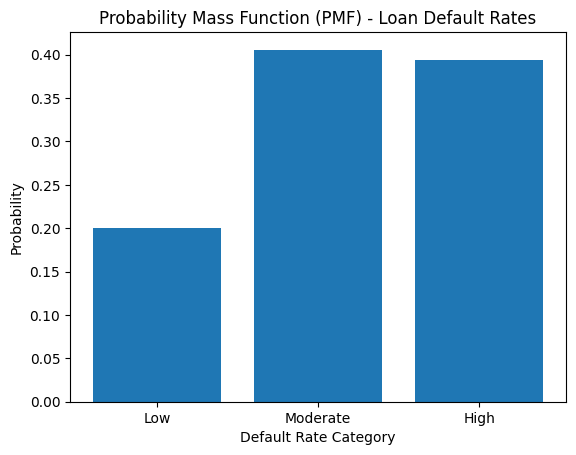

In [5]:
# Plot the PMF
categories = ['Low', 'Moderate', 'High']
pmf_values = [pmf_low, pmf_moderate, pmf_high]

plt.bar(categories, pmf_values)
plt.xlabel('Default Rate Category')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) - Loan Default Rates')
plt.show()

In [6]:
# Print PMF for different default rate categories
print(f"PMF for low default rate (<= {low_default_rate}): {pmf_low:.3f}")
print(f"PMF for moderate default rate ({low_default_rate} < rate <= {moderate_default_rate}): {pmf_moderate:.3f}")
print(f"PMF for high default rate (> {moderate_default_rate}): {pmf_high:.3f}")

PMF for low default rate (<= 0.1): 0.200
PMF for moderate default rate (0.1 < rate <= 0.2): 0.406
PMF for high default rate (> 0.2): 0.394


### Binomial distribution applications in the banking domain:

##### Loan Default Prediction:
The binomial distribution can be used to model loan default events. By considering a binary outcome (default or non-default) and using historical data, banks can estimate the probability of default for a given loan portfolio. This information helps in risk assessment, determining adequate loan provisions, and setting appropriate interest rates.

##### Credit Card Fraud Detection:
The binomial distribution can be applied to model the occurrence of credit card fraud. By considering a binary outcome (fraudulent or non-fraudulent) and analyzing historical data, banks can estimate the probability of fraud for different transactions. This information is vital in developing fraud detection models and systems.

##### Customer Churn Analysis:
The binomial distribution can be used to analyze customer churn in the banking sector. By considering a binary outcome (churn or non-churn), banks can estimate the probability of customer churn based on historical churn patterns. This information helps in customer retention strategies, such as targeted marketing campaigns and personalized offers.

##### ATM Cash Availability:
The binomial distribution can be employed to model the availability of cash at an ATM. By considering a binary outcome (cash available or cash not available) for each transaction, banks can estimate the probability of an ATM running out of cash during a specific time period. This information assists in optimizing cash management strategies, including cash replenishment schedules.

##### Loan Approval Rates:
The binomial distribution can be used to model the loan approval process. By considering a binary outcome (approval or rejection) for loan applications, banks can estimate the probability of loan approval based on various factors, such as credit score, income, and loan amount. This information helps in decision-making processes and setting appropriate loan approval criteria.

In [9]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


**Churn Probability Analysis:**
Based on historical data, what is the probability that exactly 3000 customers will churn?

In [13]:
df['churn'].value_counts(normalize=False)

0.0    12942
1.0     2987
Name: churn, dtype: int64

In [11]:
df['churn'].value_counts(normalize=True)[1].round(4)

0.1875

In [38]:
from scipy.stats import binom

total_customers = len(df)
churned_customers = 3000
probability_of_churn = df['churn'].value_counts(normalize=True)[1].round(4)
probability_of_churn

0.1875

In [39]:
# Calculate the probability using the binomial probability formula: 
# P(x) = C(n, x) * p^x * (1-p)^(n-x)

In [40]:
total_customers

15929

In [41]:
probability = binom.pmf(churned_customers, total_customers, probability_of_churn)
print(f"The probability that exactly {churned_customers} customers will churn is: {probability:.4f}")

The probability that exactly 3000 customers will churn is: 0.0078


**Customer Retention Campaign:**
The bank wants to launch a customer retention campaign targeting the customers in the dataset. How many customers should the bank aim to retain if they want to ensure that at least 13000 customers do not churn?"

In [134]:
probability_of_churn = df['churn'].value_counts(normalize=True)[1].round(4)
total_customers = len(df)
retained_customers = 13000
churned_customers = total_customers - retained_customers
churned_customers

2929

In [135]:
# Find the number of customers who will churn (n - x), then calculate the probability of at 
# most (n - x) churned customers using the cumulative distribution function (CDF).

In [136]:
from scipy.stats import binom

# Cumulative prob. for getting 2929 churned customers
probability = binom.cdf(churned_customers, total_customers, probability_of_churn)
probability

0.12268904210317282

In [137]:
probability_to_retain = 1 - probability
print(f"The probability of retaining at least {retained_customers} customers is: {probability_to_retain:.4f}")

The probability of retaining at least 13000 customers is: 0.8773


In [138]:
13000/0.8773

14818.192180553973

In [139]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


**Churn Rate Comparison:**
In the dataset, there are ??? male customers and ??? female customers. The probability of a male customer churning is estimated to be ???, while for female customers, it is ???. What is the probability that the number of male customers who churn is higher than the number of female customers who churn?

In [141]:
# If I pick a random MALE, what is the probability for his CHURN ??
# P(churn==1 | male) = ???

pd.crosstab(df['gender'], df['churn'])

churn,0.0,1.0
gender,,
Female,5208,1126
Male,7734,1861


In [142]:
1861/sum(df.gender=='Male')

0.19395518499218342

In [147]:
# P(churn==1 | Female) 
1126/sum(df.gender=='Female')

0.1777707609725292

In [148]:
df['gender'].value_counts()['Male']

9595

In [149]:
probability_of_churn_male = 1861/sum(df.gender=='Male')   # P(Churn==1 | MAle)
probability_of_churn_female = 1126/sum(df.gender=='Female')   # P(Churn==1 | Female)

In [150]:
male_customers = df['gender'].value_counts()['Male']
female_customers = df['gender'].value_counts()['Female']

In [151]:
# Find the probabilities of male and female customers churning separately and 
# calculate the probability that the number of churned male customers is 
# higher than the number of churned female customers.


probability_male = 1 - binom.cdf(male_customers - 1, male_customers + female_customers, probability_of_churn_male)
probability_female = binom.cdf(female_customers, male_customers + female_customers, probability_of_churn_female)
probability = probability_male + probability_female
print(f"The probability that the number of churned male customers is higher than the number of churned female customers is: {probability:.4f}")

The probability that the number of churned male customers is higher than the number of churned female customers is: 1.0000


**Churn and Occupation:**
Among the customers in the dataset, ??? are self-employed, and ??? are salaried. The probability of a self-employed customer churning is ???, while for salaried customers, it is ???. What is the probability that the number of self-employed customers who churn is more than the number of salaried customers who churn?

**Churn and Age Group:**
"Based on the dataset, the customers are categorized into two age groups: below 40 and 40 or above. The probability of a customer below 40 churning is ???, while for customers aged 40 or above, it is ???. What is the probability that the number of customers below 40 who churn is higher than the number of customers aged 40 or above who churn?"

# Normal Distribution

#### PDF Use Case: Loan Approval Amount
PDF can be used to understand the distribution of loan approval amounts. For example, you can calculate the PDF to determine the probability density of loan amounts in a specific range, such as `$10,000` to `$20,000` . This can provide insights into the likelihood of approving loans within different loan amount ranges.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate loan approval amounts
np.random.seed(1)
loan_amounts = np.random.normal(loc=15000, scale=5000, size=10000)

x_values = np.linspace(0, 70000, 10000)
pdf_values = norm.pdf(x_values, loc=np.mean(loan_amounts), scale=np.std(loan_amounts))

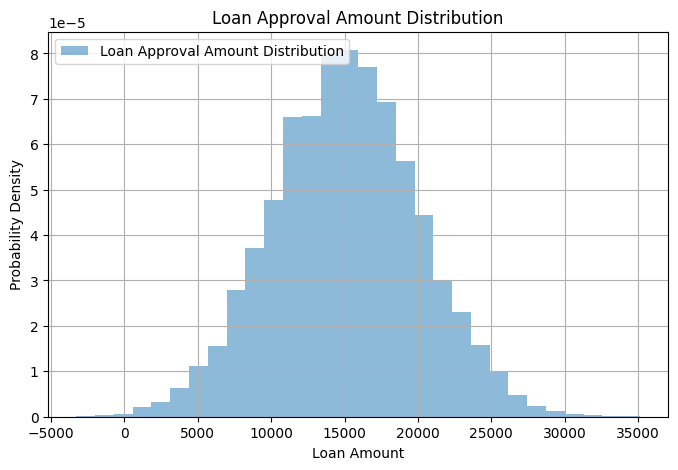

In [6]:
# Plot the loan approval amount distribution and PDF
plt.figure(figsize=(8, 5))
plt.hist(loan_amounts, bins=30, density=True, alpha=0.5, label='Loan Approval Amount Distribution')
# plt.plot(x_values, pdf_values, 'r-', label='PDF')
plt.xlabel('Loan Amount')
plt.ylabel('Probability Density')
plt.title('Loan Approval Amount Distribution')
plt.legend(loc=2)
plt.grid(True)
plt.show()

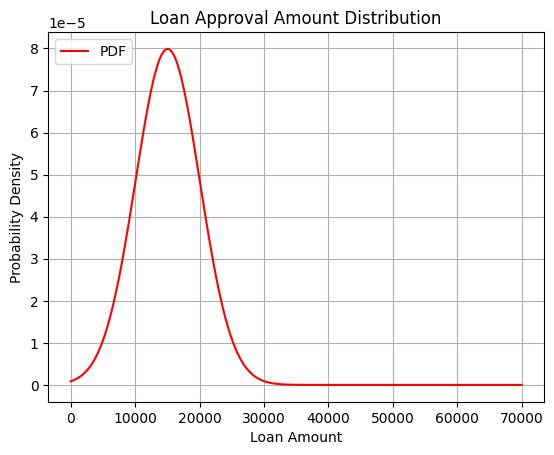

In [158]:
plt.plot(x_values, pdf_values, 'r-', label='PDF')
plt.xlabel('Loan Amount')
plt.ylabel('Probability Density')
plt.title('Loan Approval Amount Distribution')
plt.legend(loc=2)
plt.grid(True)
plt.show()

In [161]:
# Proportion of customer having loan < 10000
norm.cdf(10000, loc=15000, scale=5000)

0.15865525393145707

In [162]:
norm.cdf(10000, loc=np.mean(loan_amounts), scale=np.std(loan_amounts))

0.156008174468176

In [ ]:
# 

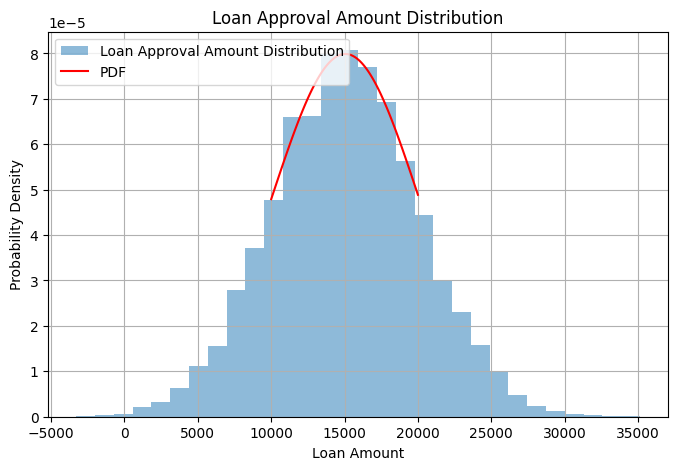

In [6]:
# Calculate PDF
range_start = 10000
range_end = 20000
x_values = np.linspace(range_start, range_end, 100)
pdf_values = norm.pdf(x_values, loc=np.mean(loan_amounts), scale=np.std(loan_amounts))

# Plot the loan approval amount distribution and PDF
plt.figure(figsize=(8, 5))
plt.hist(loan_amounts, bins=30, density=True, alpha=0.5, label='Loan Approval Amount Distribution')
plt.plot(x_values, pdf_values, 'r-', label='PDF')
plt.xlabel('Loan Amount')
plt.ylabel('Probability Density')
plt.title('Loan Approval Amount Distribution')
plt.legend(loc=2)
plt.grid(True)
plt.show()

In [8]:
norm.cdf(20000, loc=15000, scale=5000) - norm.cdf(10000, loc=15000, scale=5000)

0.6826894921370859

In [12]:
# Calculate the probability of CLTV below a threshold
loan_threshold = 25000
probability_below_threshold = np.sum(loan_amounts < loan_threshold) / len(loan_amounts)
print(f"Cumulative Probability of Loan Acceptance below {loan_threshold}: {probability_below_threshold:.2f}")


Cumulative Probability of Loan Acceptance below 25000: 0.98


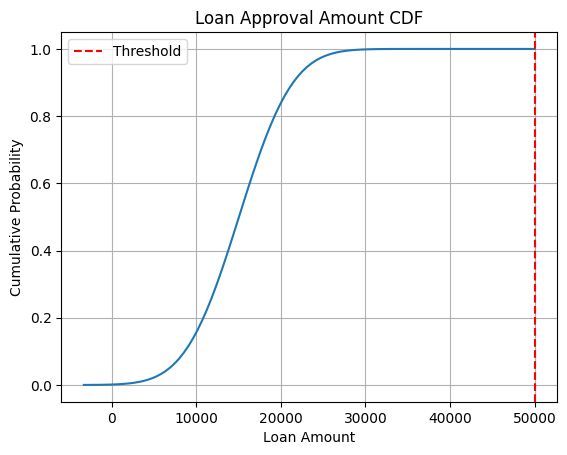

In [23]:
# Calculate CDF
threshold = 50000
x_values = np.linspace(min(loan_amounts), threshold, 100)
cdf_values = norm.cdf(x_values, loc=np.mean(loan_amounts), scale=np.std(loan_amounts))

# Plot the CDF
plt.plot(x_values, cdf_values)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Loan Amount')
plt.ylabel('Cumulative Probability')
plt.title('Loan Approval Amount CDF')
plt.legend()
plt.grid(True)
plt.show()


### CDF Use Case: Customer Lifetime Value (CLTV)
CDF can be useful for estimating the cumulative probability distribution of the Customer Lifetime Value (CLTV). By calculating the CDF, you can determine the probability that a customer's CLTV falls below or exceeds a certain threshold. This information can help in making strategic decisions regarding customer retention, loyalty programs, or targeted marketing campaigns.

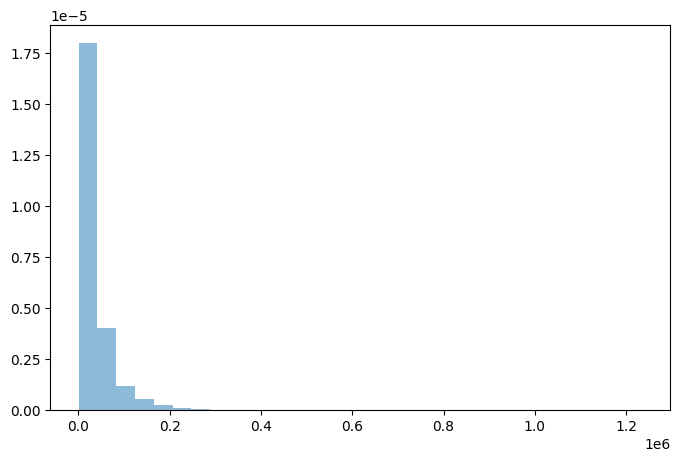

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate CLTV values
np.random.seed(1)
cltv_values = np.random.lognormal(mean=10, sigma=1, size=10000)

# Calculate CDF
x_values = np.sort(cltv_values)
cdf_values = np.arange(1, len(x_values) + 1) / len(x_values)

# Plot the CLTV distribution and CDF
plt.figure(figsize=(8, 5))
plt.hist(cltv_values, bins=30, density=True, alpha=0.5, label='CLTV Distribution')
plt.show()

The numpy.random.lognormal() function is used to generate CLTV values based on a log-normal distribution. The log-normal distribution is characterized by taking the exponential of a normally distributed random variable, resulting in a skewed distribution with positive values. The parameters mean and sigma control the mean and standard deviation of the underlying normal distribution, respectively.

Therefore, in the given example, the CLTV distribution is log-normal, not exponential.

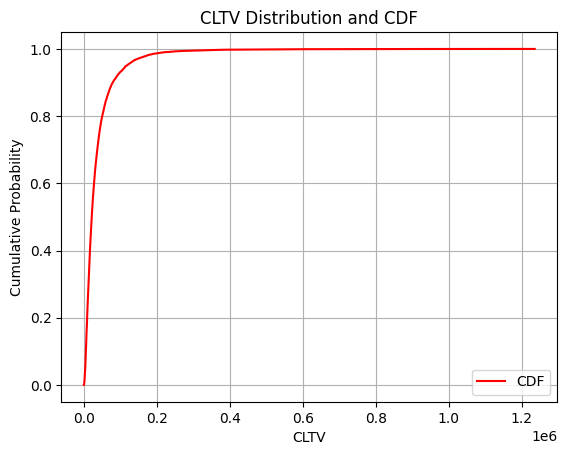

In [17]:
plt.plot(x_values, cdf_values, 'r-', label='CDF')
plt.xlabel('CLTV')
plt.ylabel('Cumulative Probability')
plt.title('CLTV Distribution and CDF')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Calculate the probability of CLTV below a threshold
cltv_threshold = 100000
probability_below_threshold = np.sum(cltv_values < cltv_threshold) / len(cltv_values)
print(f"Cumulative Probability of CLTV below {cltv_threshold}: {probability_below_threshold:.2f}")

Cumulative Probability of CLTV below 100000: 0.93
